<a href="https://colab.research.google.com/github/anindo78/Statistical-Programming-with-Colab-Notebooks/blob/main/More_practice_via_ChatGPT_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✅ Case 1: Low Complexity (Binomial Distribution & p-value)**



# Scenario:
An online retail ad campaign gets a click-through rate (CTR) of 3.5% from 10,000 impressions. Historically, the CTR for such campaigns is 3%.

Question:
Using a binomial model, test whether the observed CTR is significantly higher than historical performance at the 5% significance level.

Tasks:

Define null and alternative hypotheses.

Compute the p-value using normal approximation.

Interpret the result.

In [ ]:
import numpy as np
import scipy.stats as stats

n = 10000
ctr = 0.035

mu = 0.03

# Compare mean to a fixed value. independent - probably random so no issue. check for SF condition
print(f"Does the SF condition satisfied in this case: {(n * ctr > 10) & (n * ( 1 - ctr) > 10)}")


# h0: ctr = mu; h1: ctr > mu
alpha = 0.05

se = np.sqrt(mu * (1 - mu) / n)

z_critical = stats.norm.ppf(1 - alpha)
z_score = (ctr - mu) / se

p_value = stats.norm.sf(z_score)

print(f"The z score obtained is higher than z critical: {z_score > z_critical}")
print(f" The p value is : {p_value} since {p_value < alpha} we can {'reject' if p_value < alpha else 'accept'} ")



Does the SF condition satisfied in this case: True
The z score obtained is higher than z critical: True
 The p value is : 0.001689081641775844 since True we can reject 


# **✅ Case 2: Medium Complexity (Central Limit Theorem & Monte Carlo Simulation)**



Scenario:
You’re analyzing session durations (in seconds) on a shopping site. You know the population is right-skewed with μ = 120 and σ = 60.

Question:
Simulate drawing random samples of size 30 and 100 repeatedly to demonstrate how the sample means behave.

Tasks:

Use Monte Carlo simulation to draw 10,000 samples of each size.

Plot sampling distributions.

Compare means and standard deviations of the sample means.

Comment on the Central Limit Theorem in action.

The means & std when n = 30 is (np.float64(120.0764244920727), np.float64(120.0764244920727))
The means & std when n = 100 is (np.float64(119.96672276200373), np.float64(119.96672276200373))


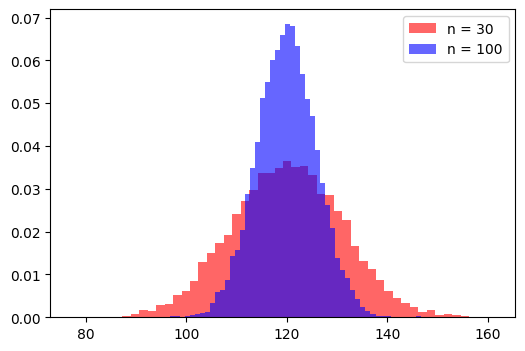

In [ ]:
import matplotlib.pyplot as plt


mu = 120
sigma = 60

n = [30, 100]
sims = 10000

samp_means1 = []
samp_means2 = []

for i in range(sims + 1):

  sample = np.random.normal(loc = mu, scale = sigma, size = n[0])
  samp_means1.append(np.mean(sample))

  sample = np.random.normal(loc = mu, scale = sigma, size = n[1])
  samp_means2.append(np.mean(sample))

mean_samp_mean1 = np.mean(samp_means1)
mean_samp_mean2 = np.mean(samp_means2)

std_samp_mean1 = np.mean(samp_means1)
std_samp_mean2 = np.mean(samp_means2)

print(f"The means & std when n = 30 is {mean_samp_mean1, std_samp_mean1}")
print(f"The means & std when n = 100 is {mean_samp_mean2, std_samp_mean2}")

# plot
plt.figure(figsize = (6, 4))
plt.hist(samp_means1, density = True, bins = 50, alpha = 0.6, color = 'red', label = 'n = 30')
plt.hist(samp_means2, density = True, bins = 50, alpha = 0.6, color = 'blue', label = 'n = 100')
plt.legend()
plt.show()

# **✅ Case 3: High Complexity (Two-Sample Hypothesis Test with Bootstrapping)**



Scenario:
Two ad formats (A and B) were tested across 1,000 users each. The conversion rate for A was 6.1%, and for B it was 5.2%. A product team wants to know if the difference is statistically significant.

**Question:**

Test whether Ad A performs better than Ad B using:

A z-test for proportions.

Bootstrapping with 10,000 resamples to estimate the sampling distribution of the difference.

Tasks:

Compute the p-value from the z-test.

Generate a bootstrap distribution of the difference in proportions.

Create a 95% confidence interval using the bootstrap distribution.

Interpret both results.

In [ ]:
p1 = 6.1
p2 = 5.2
alpha = 0.05

n1, n2 = 1000, 1000

# z test for proportions. h0: the proportions are the same, so we can used pooled. h1: the proportions are not same

p = (p1/100 * n1 + p2/100 * n2) / (n1 + n2)
pooled_se = np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
print(p, pooled_se)

z_score = (p1 - p2) / pooled_se
z_critical = stats.norm.ppf(1 - alpha / 2)

p_val = 2 * (1 - stats.norm.cdf(np.abs(z_score)))

print(f"The z score {z_score} obtained is higher than z critical: {abs(z_score) > z_critical}")
print(f" The p value is : {p_value} since {p_value < alpha} we can {'reject' if p_value < alpha else 'accept'} ")

0.0565 0.010325478197158715
The z score 87.16303330606561 obtained is higher than z critical: True
 The p value is : 0.001689081641775844 since True we can reject 


The 95% confidence interval is (np.float64(0.0049999999999999975), np.float64(0.045000000000000005))


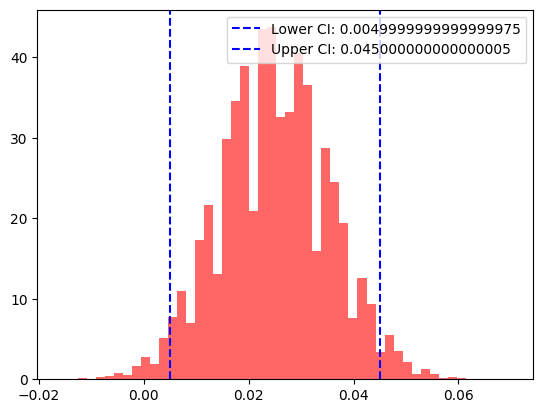

In [ ]:
# generate bootstrap distribution of diff in proportions

sims = 100000
diff_proportions = []

# create a sample from binomial for both the ad formats
s1 = np.random.binomial(1, p1/100, size = 1000)
s2 = np.random.binomial(1, p2/100, size = 1000)

for i in range(sims + 1):

  sample1 = np.random.choice(s1, size = 1000, replace = True)
  sample2 = np.random.choice(s2, size = 1000, replace = True)

  diff_proportions.append(np.mean(sample1) - np.mean(sample2))

# ci
ci_lower = np.percentile(diff_proportions, alpha / 2 * 100)
ci_upper = np.percentile(diff_proportions, (1 - alpha / 2) * 100)

print(f"The 95% confidence interval is {ci_lower, ci_upper}")

plt.hist(diff_proportions, density = True, bins = 50, alpha = 0.6, color = 'red')
plt.axvline(x = ci_lower, color = 'blue', linestyle = '--', label = f'Lower CI: {ci_lower}')
plt.axvline(x = ci_upper, color = 'blue', linestyle = '--', label = f'Upper CI: {ci_upper}')
plt.legend()
plt.show()

## **✅ Case 4: Low Complexity (Sampling Distribution & Normal Approximation)**



Scenario:
A display ad campaign had an average session duration of 4.2 minutes across a random sample of 64 users. The historical population mean is 4 minutes with a standard deviation of 1.6 minutes.

Question:
Is this new campaign significantly increasing session time?

Tasks:

Compute the z-statistic using the sampling distribution of the mean.

Calculate the p-value (two-tailed).

State your conclusion at α = 0.05.

In [ ]:
n = 64
mu = 4
sd = 1.6
pe = 4.2

# h0: pe same as mu h1: pe != mu

# let's check for independence: randomized.
# check for SF here n > 30, so we can assume normality

alpha = 0.05

se = sd / np.sqrt(n)
z_score = (pe - mu) / se
z_critical = stats.norm.ppf(1 - alpha / 2)

upper = pe + z_critical * se
lower = pe - z_critical * se

print(f"The 95% confidence interval is {lower, upper}")


p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))
print(f"The z score obtained is higher than z critical: {z_score > z_critical}")
print(f" The p value is : {p_value} since {p_value < alpha} we can {'reject' if p_value < alpha else 'accept'} ")

The 95% confidence interval is (np.float64(3.8080072030919894), np.float64(4.591992796908011))
The z score obtained is higher than z critical: False
 The p value is : 0.3173105078629137 since False we can accept 


# **✅ Case 5: Medium Complexity (CLT + Bootstrapping Comparison)**


**Scenario:**

A product manager wants to compare the average number of ad impressions per session before and after a UI change.
They sampled 60 sessions before and 60 after. The raw numbers are available in Python arrays.

**Question:**

Estimate the 95% confidence interval for the difference in means between before and after using:

Normal approximation (assume population variance unknown).

Bootstrapping (10,000 resamples).

Tasks:

Simulate two synthetic arrays using np.random.poisson(μ, 60) for both groups.

Compute the t-based CI for difference in means.

Compute the bootstrap-based CI and compare.

Visualize the bootstrap distribution and discuss the differences.

In [ ]:
import numpy as np
import scipy.stats as stats

# Simulate two synthetic arrays using np.random.poisson(μ, 60) for both groups.
np.random.seed(42)

lambda_before = 8
lambda_after = 10
before = np.random.poisson(lambda_before, 60)
after = np.random.poisson(lambda_after, 60)

# h0: both means are same, h1: means are different

# independence: met as random. SF condition: n > 30, so we can use normality assumptions
# pop variance is known, so we should use t distribution


m1 = np.mean(before)
m2 = np.mean(after)
s1 = np.std(before)
s2 = np.std(after)
n1, n2 = 60, 60
alpha = 0.05

# pooled as they measure users before and after, paired
# CORRECTION post chatGPT solution. We cannot use pooled as variances aren't equal since by definition I am taking before, after as diff values
# CORRECTION...contd: The variance in poisson is lambda so they are different. We need to proceed with Welch's test

# modify my code post the correction
se = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
print(f"the standard error is: {se}")

# dof is a very complicated equation
# df = (s₁²/n₁ + s₂²/n₂)² / ((s₁²/n₁)²/(n₁-1) + (s₂²/n₂)²/(n₂-1))

dof = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2 / (((s1 ** 2 / n1) ** 2) / (n1 - 1) + ((s2 ** 2 / n2) ** 2) / (n2 - 1))
print(dof)

t_score = (m2 - m1) / se
print(m2-m1)


t_critical = stats.t.ppf(1 - alpha / 2, df = dof)

print(t_score, t_critical)

p_value = 2 * (1 - stats.t.cdf(np.abs(t_score), df = dof))

lower = (m2 - m1) - t_critical * se
upper = (m2 - m1) + t_critical * se

print(f"The t score obtained is higher than t critical: {np.abs(t_score) > t_critical}")
print(f" The p value is : {p_value} since {p_value < alpha / 2} we can {'reject' if p_value < alpha / 2 else 'accept'} ")
print(f"The upper and lower CI using t test is: {lower, upper}")

the standard error is: 0.5209322128361523
116.78288944415732
1.466666666666666
2.815465487690955 1.9804860696787252
The t score obtained is higher than t critical: True
 The p value is : 0.0057188605697362505 since True we can reject 
The upper and lower CI using t test is: (np.float64(0.4349676758977534), np.float64(2.4983656574355786))


In [ ]:
# bootstrap this

lambda_before = 8
lambda_after = 10
before = np.random.poisson(lambda_before, 60)
after = np.random.poisson(lambda_after, 60)

alpha = 0.05

diff_bef_aft = []
sims = 10000

for i in range(sims + 1):

  bef = np.random.choice(before, size = 60, replace = True)
  aft = np.random.choice(after, size = 60, replace = True)
  diff_bef_aft.append(np.mean(aft) - np.mean(bef))

print(np.mean(diff_bef_aft))

ci_lower = np.percentile(diff_bef_aft, 2.5)
ci_upper = np.percentile(diff_bef_aft, 97.5)

print(f"The upper and lower CI using Bootstrapping is: {ci_lower, ci_upper}")

2.5260690597606907
The upper and lower CI using Bootstrapping is: (np.float64(1.3499999999999996), np.float64(3.6833333333333327))


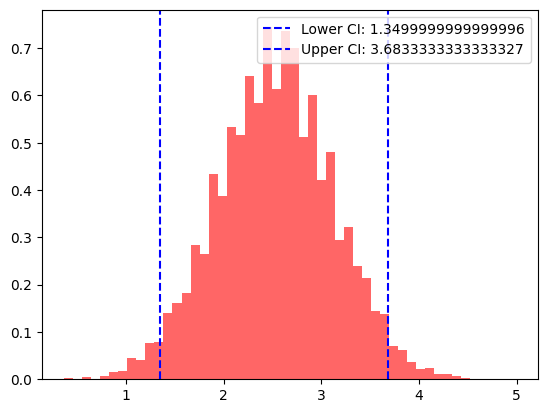

In [ ]:
plt.hist(diff_bef_aft, density = True, bins = 50, alpha = 0.6, color = 'red')
plt.axvline(x = ci_lower, color = 'blue', linestyle = '--', label = f'Lower CI: {ci_lower}')
plt.axvline(x = ci_upper, color = 'blue', linestyle = '--', label = f'Upper CI: {ci_upper}')
plt.legend()
plt.show()

In [ ]:
# chatGPT solution

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# --- Generate synthetic data ---
# before = np.random.poisson(8, 60)   # Before UI change
# after = np.random.poisson(10, 60)   # After UI change

# --- Welch's t-test-based CI (95%) ---
mean_diff = after.mean() - before.mean()
print(mean_diff)

# Standard error of the difference
se_diff = np.sqrt(np.var(before, ddof=1)/len(before) + np.var(after, ddof=1)/len(after))
print(f"the standard error is: {se_diff}")

# Degrees of freedom using Welch-Satterthwaite equation
df_num = (np.var(before, ddof=1)/len(before) + np.var(after, ddof=1)/len(after))**2
df_denom = ((np.var(before, ddof=1)/len(before))**2 / (len(before)-1) +
            (np.var(after, ddof=1)/len(after))**2 / (len(after)-1))
df = df_num / df_denom
print(df)

# t critical value
t_crit = stats.t.ppf(0.975, df)
print(f"t critical value is: {t_crit}")

# 95% CI using t-distribution
ci_t = (mean_diff - t_crit * se_diff, mean_diff + t_crit * se_diff)

print("Welch's t-based 95% CI:", ci_t)

1.466666666666666
the standard error is: 0.5253283432038081
116.7828894441573
t critical value is: 1.9804860696787252
Welch's t-based 95% CI: (np.float64(0.42626120094411957), np.float64(2.5070721323892124))


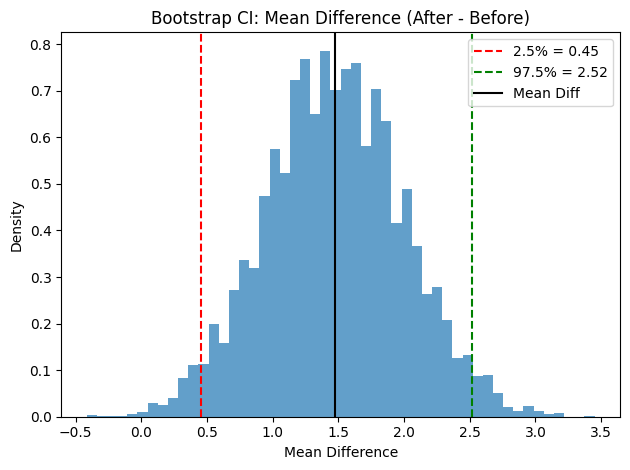

Welch's t-based 95% CI: (np.float64(0.42626120094411957), np.float64(2.5070721323892124))
Bootstrap 95% CI: (np.float64(0.4499999999999993), np.float64(2.5166666666666666))
Bootstrap Mean Difference: 1.4721983333333333


In [ ]:
# --- Bootstrapping (95% CI) ---
n_boot = 10000
boot_diffs = []

for _ in range(n_boot):
    sample_before = np.random.choice(before, size=len(before), replace=True)
    sample_after = np.random.choice(after, size=len(after), replace=True)
    boot_diffs.append(np.mean(sample_after) - np.mean(sample_before))

# Bootstrap CI
ci_boot = np.percentile(boot_diffs, [2.5, 97.5])
boot_mean_diff = np.mean(boot_diffs)

# --- Plotting ---
plt.hist(boot_diffs, bins=50, density=True, alpha=0.7)
plt.axvline(ci_boot[0], color='red', linestyle='--', label=f"2.5% = {ci_boot[0]:.2f}")
plt.axvline(ci_boot[1], color='green', linestyle='--', label=f"97.5% = {ci_boot[1]:.2f}")
plt.axvline(boot_mean_diff, color='black', linestyle='-', label='Mean Diff')
plt.title("Bootstrap CI: Mean Difference (After - Before)")
plt.xlabel("Mean Difference")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# --- Output the results ---
print("Welch's t-based 95% CI:", ci_t)
print("Bootstrap 95% CI:", tuple(ci_boot))
print("Bootstrap Mean Difference:", boot_mean_diff)



# **✅ Case 6: High Complexity (Two-Sample Test for Proportions + Monte Carlo Power Analysis)**



Scenario:
You're running an A/B test comparing two ad creatives:

Control has 5.0% CTR on 5,000 impressions.

Treatment has 5.7% CTR on 5,000 impressions.

Question:
Determine whether this lift is statistically significant using:

Z-test for proportions.

Monte Carlo simulation to estimate statistical power at α = 0.05 if the true CTR lift is 0.7%.

Tasks:

Compute z-test and interpret.

Write a Monte Carlo simulation to:

Simulate 10,000 tests under the true difference (0.057 vs 0.05),

Calculate the proportion of tests that reject the null at α = 0.05.

Report the estimated power of the test.

Would you recommend increasing sample size?

In [ ]:
p1 = 0.050
p2 = 0.057

n1, n2 = 5000, 5000
alpha = 0.05

# z test for proportions

p = (p1 * n1 + p2 * n2 )/ (n1 + n2)
se = np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
print(p, se)

z_score = (p1 - p2) / se
z_critical = stats.norm.ppf(1 - alpha / 2)

p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))

lower = (p1 - p2) - z_critical * se
upper = (p1 - p2) + z_critical * se


print(f"The z score {z_score} obtained is higher than z critical: {np.abs(z_score) > z_critical}")
print(f" The p value is : {p_value} since {p_value < alpha / 2} we can {'reject' if p_value < alpha / 2 else 'accept'} ")
print(f"The upper and lower CI using t test is: {lower, upper}")


0.0535 0.004500566630992147
The z score -1.5553597077745862 obtained is higher than z critical: False
 The p value is : 0.11986042453400936 since False we can accept 
The upper and lower CI using t test is: (np.float64(-0.015820948506767372), np.float64(0.0018209485067673756))


In [ ]:
# Write a Monte Carlo simulation to:

# Simulate 10,000 tests under the true difference (0.057 vs 0.05),


sims = 10000
diff_means = []
rejections = 0

for _ in range(sims + 1):

  sample1 = np.random.binomial(1, p1, size = 5000)
  sample2 = np.random.binomial(1, p2, size = 5000)
  p1 = np.mean(sample1)
  p2 = np.mean(sample2)
  diff_means.append(p1 - p2)

  # Use pooled proportion from simulated samples
  p_pool_sim = (p1 + p2) / 2
  se_sim = np.sqrt(p_pool_sim * (1 - p_pool_sim) * (1 / n1  + 1 / n2))

  z_sim = (p2 - p1) / se_sim
  p_val_sim = 2 * (1 - stats.norm.cdf(abs(z_sim)))

  if p_val_sim < alpha:
    rejections += 1


# Calculate the CI for diff in means at α = 0.05.

ci_lower = np.percentile(diff_means, 2.5)
ci_upper = np.percentile(diff_means, 97.5)
print(f"The upper and lower CI using Bootstrapping is: {ci_lower, ci_upper}")

power = rejections / sims
print(f"Estimated Power (for 0.7% true lift): {power:.4f}")

# Calculate the proportion of tests that reject the null at α = 0.05.
prop_test_reject = np.mean(np.abs(diff_means) >= 0.007)
print(f"Via Monte Carlo method proportion of tests where difference is more than 7% is: {prop_test_reject}")


/tmp/ipython-input-78-2172133989.py:22: RuntimeWarning: invalid value encountered in scalar divide
  z_sim = (p2 - p1) / se_sim


The upper and lower CI using Bootstrapping is: (np.float64(0.0), np.float64(0.028))
Estimated Power (for 0.7% true lift): 0.0984
Via Monte Carlo method proportion of tests where difference is more than 7% is: 0.08899110088991101


In [ ]:
# chat GPT solution to the above problem

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# --- Parameters ---
n = 5000  # sample size per group
p_control = 0.050  # CTR for control group
p_treatment = 0.057  # CTR for treatment group
alpha = 0.05  # significance level

# --- Step 1: Z-test for observed proportions ---
# Pooled proportion
p_pool = (p_control + p_treatment) / 2
se_pool = np.sqrt(p_pool * (1 - p_pool) * (2 / n))
z_stat = (p_treatment - p_control) / se_pool
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(p_pool, se_pool)
print(f"Z-statistic: {z_stat:.4f}")
print(f"Two-sided p-value: {p_value:.4f}")

# # --- Step 2: Monte Carlo Simulation for Power Estimation ---
np.random.seed(42)
n_sim = 10000
rejections = 0

for _ in range(n_sim):
    sample_control = np.random.binomial(1, p_control, n)
    sample_treatment = np.random.binomial(1, p_treatment, n)

    p1 = sample_control.mean()
    p2 = sample_treatment.mean()

    # Use pooled proportion from simulated samples
    p_pool_sim = (p1 + p2) / 2
    se_sim = np.sqrt(p_pool_sim * (1 - p_pool_sim) * (2 / n))

    z_sim = (p2 - p1) / se_sim
    p_val_sim = 2 * (1 - stats.norm.cdf(abs(z_sim)))

    if p_val_sim < alpha:
        rejections += 1

power = rejections / n_sim
print(f"Estimated Power (for 0.7% true lift): {power:.4f}")


0.053500000000000006 0.0045005666309921475
Z-statistic: 1.5554
Two-sided p-value: 0.1199
Estimated Power (for 0.7% true lift): 0.3391
